In [21]:
#import pickle
#import torch
#import torch.optim as optim
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#from dynamic_disease_network_ddp import data_loader
#from dynamic_disease_network_ddp import models
import pandas as pd
import copy

In [43]:
ncsr = pd.read_csv('justage_vars_init.csv', index_col=0)
ncsr_test = copy.deepcopy(ncsr)

In [42]:
ncsr

,CASEID,D22A,D22C,D37A,D37B,D38C,D42,D47,D59A,D72A,...,EA15A,EA19A,EA19B,EA19B1,EA22A,EA26A,EA26B1,EA29A,EA35A,EA37A
0,1,35,-1,34,-1,40,-1,-1,34,35,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,124,19,-1,19,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,153,35,-1,35,-1,23,-1,-1,23,35,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,173,-1,35,34,-1,35,-1,-1,-1,35,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,187,43,-1,31,-1,43,-1,-1,-1,31,...,-1,22,-1,-1,51,-1,-1,-1,21,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,9187,-1,27,-1,-1,-1,-1,-1,24,24,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
375,9238,46,-1,46,-1,46,-1,-1,-1,47,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
376,9250,47,-1,26,-1,46,-1,-1,27,47,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
377,9256,22,-1,19,-1,-1,-1,-1,-1,11,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [17]:
cn = 0
test = ncsr.iloc[cn,:]

In [18]:
case1_dict = {}
for x in range(1, len(test)):
    if test[x] > -1:
        case1_dict[ncsr.columns[x]] = test[x]

In [54]:
sorted_values = sorted(case1_dict.values())
sorted_dict = {}
for i in sorted_values:
    for k in case1_dict.keys():
        if case1_dict[k] == i:
            sorted_dict[k] = case1_dict[k]
            case1_dict[k] = -1
            break

In [87]:

    sorted_case = ncsr.iloc[x, 1:].sort_values()
    sorted_vars = list(sorted_case.index)
    sorted_vars[3]

'GM16B'

In [105]:
dpp_data = []

ncsr = pd.read_csv('justage_vars_init.csv', index_col=0)
for x in ncsr.index: 
    last_event = 0
    sorted_case = ncsr.iloc[x, 1:].sort_values()
    sorted_vars = list(sorted_case.index)
    dpp_data.append([])
    count = 0 
    for y in range(len(sorted_case)):
        if sorted_case[y] != -1:
            dpp_data[x].append({})
            dpp_data[x][count]['idx_event'] = count + 1
            dpp_data[x][count]['type_event'] = list(ncsr.columns).index(sorted_vars[y])
            dpp_data[x][count]['time_since_start'] = sorted_case[y]/max(sorted_case)
            dpp_data[x][count]['time_since_last_same_event'] = sorted_case[y]/max(sorted_case)
            dpp_data[x][count]['time_since_last_event'] = sorted_case[y]/max(sorted_case) - last_event
            last_event = sorted_case[y]/max(sorted_case)
            count += 1


In [103]:
dpp_data[3]


[{'idx_event': 1,
  'type_event': 246,
  'time_since_start': 0.16666666666666666,
  'time_since_last_same_event': 0.16666666666666666,
  'time_since_last_event': 0.16666666666666666},
 {'idx_event': 2,
  'type_event': 247,
  'time_since_start': 0.16666666666666666,
  'time_since_last_same_event': 0.16666666666666666,
  'time_since_last_event': 0.0},
 {'idx_event': 3,
  'type_event': 219,
  'time_since_start': 0.5,
  'time_since_last_same_event': 0.5,
  'time_since_last_event': 0.33333333333333337},
 {'idx_event': 4,
  'type_event': 284,
  'time_since_start': 0.5,
  'time_since_last_same_event': 0.5,
  'time_since_last_event': 0.0},
 {'idx_event': 5,
  'type_event': 220,
  'time_since_start': 0.7083333333333334,
  'time_since_last_same_event': 0.7083333333333334,
  'time_since_last_event': 0.20833333333333337},
 {'idx_event': 6,
  'type_event': 285,
  'time_since_start': 1.0,
  'time_since_last_same_event': 1.0,
  'time_since_last_event': 0.29166666666666663},
 {'idx_event': 7,
  'type_

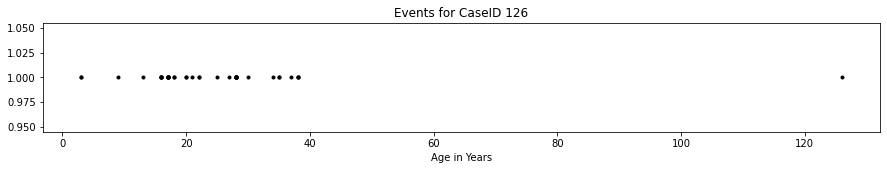

In [53]:
cn = 125
sorted_values = [ x for x in ncsr.iloc[cn,:] if x != -1 ]
plt.figure(figsize=(15, 2))
plt.title("Events for CaseID "+ str(cn+1))
plt.xlabel("Age in Years")
plt.plot(np.array(sorted_values), np.ones(len(sorted_values)), 'k.')
plt.savefig("case_id_events_" + str(cn+1) + ".jpg", bbox_inches = 'tight')

In [56]:
from tick.plot import plot_point_process
from tick.hawkes import SimuHawkes, HawkesKernelSumExp

In [64]:
hawkes = SimuHawkes(n_nodes=1, end_time = 40, verbose=False, baseline = sorted_values)

ValueError: n_nodes will be automatically calculated if baseline or kernels is set

In [58]:
hawkes

In [59]:
hawkes.simulate

<bound method Simu.simulate of <tick.hawkes.simulation.simu_hawkes.SimuHawkes object at 0x00000294CC616430>>

In [63]:
np.ndarray(6)

array([8.27578359e-313, 8.27578359e-313, 3.39519327e-313, 3.39519327e-313,
       8.48798317e-314, 6.36598737e-313])

In [74]:
mc = pd.read_csv("monte_carlo_matrix.csv", index_col=0)

In [75]:
mc = mc/4708900


In [76]:
mc

,D37A,D37B,D42,D47,D59A,D72A,D87A,D37B1,M18A,M18B1,...,DM_MR19,PT246A,PT256A,EA12B1,EA19A,EA19B,EA19B1,EA26A,EA35A,EA37A
D37A,0.000000,0.000019,0.000025,0.000022,0.000018,0.000022,0.000021,0.000021,0.000019,0.000019,...,0.000021,0.000022,0.000019,0.000021,0.000020,0.000020,0.000022,0.000018,0.000024,0.000024
D37B,0.000019,0.000000,0.000022,0.000021,0.000020,0.000020,0.000018,0.000021,0.000021,0.000020,...,0.000017,0.000019,0.000021,0.000024,0.000019,0.000021,0.000024,0.000018,0.000022,0.000022
D42,0.000025,0.000024,0.000000,0.000021,0.000022,0.000021,0.000024,0.000021,0.000024,0.000018,...,0.000021,0.000023,0.000019,0.000021,0.000023,0.000021,0.000021,0.000021,0.000020,0.000021
D47,0.000023,0.000021,0.000024,0.000000,0.000022,0.000020,0.000023,0.000021,0.000019,0.000022,...,0.000020,0.000021,0.000022,0.000023,0.000019,0.000020,0.000024,0.000018,0.000026,0.000021
D59A,0.000023,0.000022,0.000021,0.000020,0.000000,0.000017,0.000021,0.000022,0.000022,0.000024,...,0.000024,0.000021,0.000021,0.000022,0.000024,0.000023,0.000019,0.000020,0.000020,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EA19B,0.000019,0.000024,0.000022,0.000021,0.000020,0.000021,0.000024,0.000021,0.000021,0.000023,...,0.000022,0.000022,0.000021,0.000018,0.000021,0.000000,0.000019,0.000024,0.000021,0.000018
EA19B1,0.000024,0.000017,0.000020,0.000018,0.000022,0.000022,0.000022,0.000021,0.000023,0.000023,...,0.000021,0.000023,0.000020,0.000021,0.000021,0.000021,0.000000,0.000021,0.000022,0.000021
EA26A,0.000020,0.000023,0.000023,0.000020,0.000021,0.000020,0.000023,0.000024,0.000022,0.000021,...,0.000021,0.000023,0.000022,0.000020,0.000021,0.000022,0.000019,0.000000,0.000020,0.000024
EA35A,0.000021,0.000024,0.000020,0.000021,0.000022,0.000021,0.000021,0.000020,0.000022,0.000018,...,0.000021,0.000025,0.000022,0.000021,0.000021,0.000021,0.000023,0.000020,0.000000,0.000021


In [81]:
mc

,D37A,D37B,D42,D47,D59A,D72A,D87A,D37B1,M18A,M18B1,...,DM_MR19,PT246A,PT256A,EA12B1,EA19A,EA19B,EA19B1,EA26A,EA35A,EA37A
D37A,0.000000,0.000019,0.000025,0.000022,0.000018,0.000022,0.000021,0.000021,0.000019,0.000019,...,0.000021,0.000022,0.000019,0.000021,0.000020,0.000020,0.000022,0.000018,0.000024,0.000024
D37B,0.000019,0.000000,0.000022,0.000021,0.000020,0.000020,0.000018,0.000021,0.000021,0.000020,...,0.000017,0.000019,0.000021,0.000024,0.000019,0.000021,0.000024,0.000018,0.000022,0.000022
D42,0.000025,0.000024,0.000000,0.000021,0.000022,0.000021,0.000024,0.000021,0.000024,0.000018,...,0.000021,0.000023,0.000019,0.000021,0.000023,0.000021,0.000021,0.000021,0.000020,0.000021
D47,0.000023,0.000021,0.000024,0.000000,0.000022,0.000020,0.000023,0.000021,0.000019,0.000022,...,0.000020,0.000021,0.000022,0.000023,0.000019,0.000020,0.000024,0.000018,0.000026,0.000021
D59A,0.000023,0.000022,0.000021,0.000020,0.000000,0.000017,0.000021,0.000022,0.000022,0.000024,...,0.000024,0.000021,0.000021,0.000022,0.000024,0.000023,0.000019,0.000020,0.000020,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EA19B,0.000019,0.000024,0.000022,0.000021,0.000020,0.000021,0.000024,0.000021,0.000021,0.000023,...,0.000022,0.000022,0.000021,0.000018,0.000021,0.000000,0.000019,0.000024,0.000021,0.000018
EA19B1,0.000024,0.000017,0.000020,0.000018,0.000022,0.000022,0.000022,0.000021,0.000023,0.000023,...,0.000021,0.000023,0.000020,0.000021,0.000021,0.000021,0.000000,0.000021,0.000022,0.000021
EA26A,0.000020,0.000023,0.000023,0.000020,0.000021,0.000020,0.000023,0.000024,0.000022,0.000021,...,0.000021,0.000023,0.000022,0.000020,0.000021,0.000022,0.000019,0.000000,0.000020,0.000024
EA35A,0.000021,0.000024,0.000020,0.000021,0.000022,0.000021,0.000021,0.000020,0.000022,0.000018,...,0.000021,0.000025,0.000022,0.000021,0.000021,0.000021,0.000023,0.000020,0.000000,0.000021


In [80]:
(217*216)

46872